## Data Exploration

In this notebook, we'll take the opportunity to explore the data we will be using.  Data exploration and understanding is a fundamental step in Machine Learning.

In this lab, the data we'll be looking at is the Diabetes data set.  It consists of ~800 rows of medical data (e.g. blood pressure, heart rate etc...) for female patients with and without diabetes.  It is worth mentioning that in ML, 800 examples is considered a very very small dataset.  We'll be creating a model that will help us determine which of our patients, based on their medical data, may have diabetes.

It is helpful to know a few characteristics about the dataset in this lab.  Specifically how it is laid out.  In the Diabetes dataset we have provided, we have done some preprocessing of the data.  The data you will be provided with is in CSV format.  There are no patient names provided in this dataset.

This dataset will be used to train the model to recognize which medical data (e.g. blood pressure, blood values) are common in patients who have diabetes.

At the end of this notebook, we'll have a better understanding of what our data looks like, and that will help us when constructing the AI in the future notebook.

To start, let's load the data!

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# load diabetes dataset into a dataframe called 'df'
df = pd.read_csv("diabetes.csv")

#Obtain the length (rows) and shape (columns) of our dataset
len(df)
df.shape

(768, 9)

We see that there are 769 rows and 9 columns

In [16]:
#check the dataframe to make certain that there aren't any null values. We do this by using info().
#Note: 'object' datatype is a catch-all for all columns that Pandas doesn't recognize as any other specific type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


We can see the column names and associated data types.  Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, Age and Outcome are of data type integer (e.g. 34, 2, 98).

BMI and Diabetes PedigreeFuntion are of data type float (e.g. 1.3, 4.56)

Let's use the describe() function to learn statistical information (e.g. mean, standard deviation, min, max...) for each of our columns.

In [17]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We see that there are 769 entries in our dataset.  There are 9 columns and they are all non-null.

The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Pregnancies    - Number of times pregnant
Glucose        - Plasma glucose concentration a 2 hours in an oral glucose tolerance test
Blood Pressure - Diastolic blood pressure (mm Hg)
SkinThickness  - Triceps skin fold thickness (mm)
Insulin        - 2-Hour serum insulin (mu U/ml)
BMI            - Body mass index (weight in kg/(height in m)^2)
DiabetesPedigreeFunction - Diabetes pedigree function
Age            - Age (years)
Outcome        - Class variable (0 or 1) 268 of 768 are 1, the others are 0

A quick function we can use to examine the first 5 rows of data (plus the column names) is the head() function.
df.head()

Using head() we can see the column names of our dataframe:  Pregnancies, Glucose, BloodPressure, Skinthickness, Insulin, BMI, 
DiabetespedigreeFunction, Age and Outcome

In [18]:
#Let's examine the last 5 rows of our dataframe
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


Let's now look at our data using a series of histograms and plots in order to see how 'distributed' our data appears.  We can do this using the hist() function to visually see how our data is distributed for each column in our data set.  This will allow us to determine if any of the columns have 'outliers'.  

Outliers are data points that differ significantly from other data points.  They can be due to a variability in measurement or may even indicate a measurement error. It is up to the Data Engineer (or Data Scientist) to determine if the outlier(s) are considered abnormal and should be removed or kept within the dataset. 

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

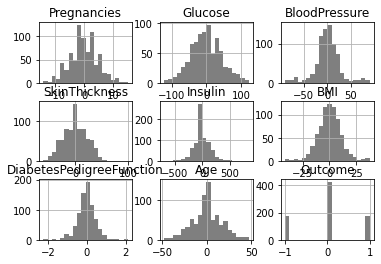

In [19]:
#plot histograms of the columns on multiple subplots
plt.close('all')

df.diff().hist(color="k", alpha=0.5, bins=20)

From the above histograms we can see that our dataset is evenly distributed except for some outliers in BMI, Outcomes and DiabetesPedigreeFunction.  For now we will keep the outliers in our dataset.

<AxesSubplot:>

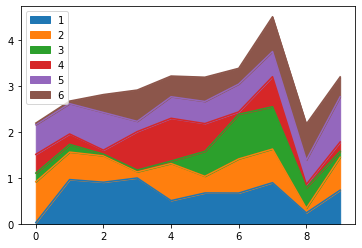

In [20]:
#plot area plot
df = pd.DataFrame(np.random.rand(10,6), columns=["1", "2", "3", "4", "5", "6"])
df.plot.area()

<AxesSubplot:xlabel='3', ylabel='6'>

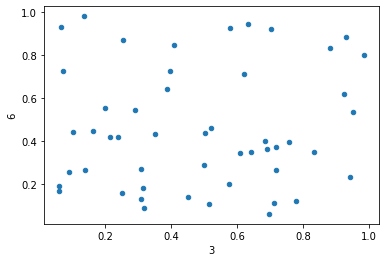

In [21]:
#create a scatter plot of Pregnancies, Glucose, BloodPressure, Skinthickness, Insulin, BMI, DiabetespedigreeFunction, Age and Outcome
df = pd.DataFrame(np.random.rand(50, 2), columns=["3", "6"])

df.plot.scatter(x="3", y="6")
